# Apply Edge-valued Clique (EVC) Filtrations to study persistent homology of convection cycles for total imbalance of a stationary state


## This reproduces figures 3 and 4 in the paper


### Minh Quang Le, 9/10/2021

In [1]:
%pylab inline 
import networkx as nx
import matplotlib.colors as colors
import sys
import gudhi as gd
sys.path.append('../utils')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from EVC_util import *
from util import *

# 1. Create directed graph with function defined on edges

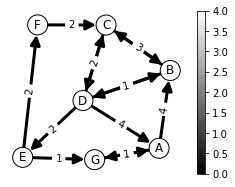

In [3]:
#create directed weighted graph
G = make_toy_graph()
node_colors = 4*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))


edge_colors = np.zeros(len(list(G.edges())))

edge_colors = np.zeros(len(list(G.edges())))
#node_cmap = plt.cm.gray
node_cmap = plt.cm.gray
edge_cmap = plt.cm.gray
s = edge_cmap
node_size = 400
edge_width = 3
vmin = 0
vmax = 4

fig1,ax = plt.subplots(1,1,figsize=(4,3))
draw_toy_graph(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax)
savefig('directed.pdf')

In [4]:
#compute PageRank
A = np.array((nx.adjacency_matrix(G)).todense())
alpha = 1
p_rank = pagerank(A,alpha)


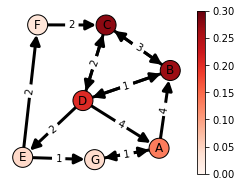

In [5]:
node_colors = p_rank
node_cmap = plt.cm.Reds
s = node_cmap
edge_colors = np.zeros(len(list(G.edges())))
vmin = 0
vmax = .3
fig1,ax = plt.subplots(1,1,figsize=(4,3))
draw_toy_graph(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax)

plt.savefig('stationary.pdf')

In [6]:
P = google_matrix(A,alpha) # transition matrix
F =  np.dot(np.diag(p_rank),P) # net flows over edges


# 2. Create the edge flows on graph G

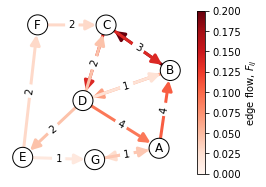

In [7]:
# create the edge flow on graph
node_colors  = .8*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
node_cmap = plt.cm.gray
    
edge_colors = get_edge_colors(A,F)
edge_cmap = plt.cm.Reds
s = edge_cmap
vmax = .2
fig1,ax = plt.subplots(1,1,figsize=(4,3))
draw_toy_graph(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax,'edge flow, $F_{ij}$')
savefig('netflow.pdf')  


# 3. Create the total imbalance for edge flows on graph

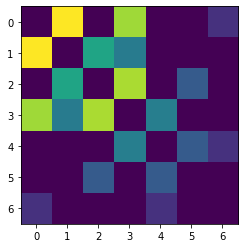

In [8]:
Delta = (F - F.T)/2 # imbalance for net flows over edges
m,n = shape(Delta)
Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
imshow(Delta_symmetric)

XX = Delta_symmetric

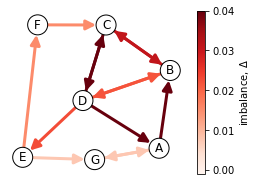

In [9]:
#create the imbalance of the edge flows on graph
node_colors = .8*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
node_cmap = plt.cm.gray
    
m,n = shape(Delta)
Delta_symmetric = max_matrix(Delta,m,n) # magnitude of imbalance for net flows 
    
edge_colors = get_edge_colors(A,Delta_symmetric)
vmin = -.001
vmax = .04
fig1,ax = plt.subplots(1,1,figsize=(4,3))
draw_toy_graph2(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax, 'imbalance,$\Delta_{ij}$')
sm = plt.cm.ScalarMappable(cmap=s, norm=plt.Normalize(vmin = vmin, vmax=vmax))
color_title = 'imbalance, $\Delta$'
sm._A = []
plt.colorbar(sm,label=color_title)

plt.savefig('imba.pdf')

# 4. Create EVC filtration for total imbalance on graph

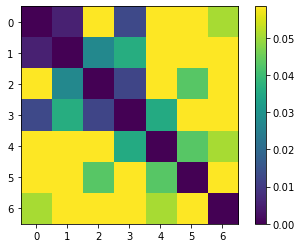

In [10]:
max_value = np.max(Delta_symmetric)*1.1
filtration_matrix,filtration_steps =  get_filtration_matrix(Delta_symmetric,max_value=max_value,numsteps=6)
fil_matrix,fil_steps =  get_filtration_matrix_3(Delta_symmetric,max_value=max_value,numsteps=6)
imshow(fil_matrix);plt.colorbar();


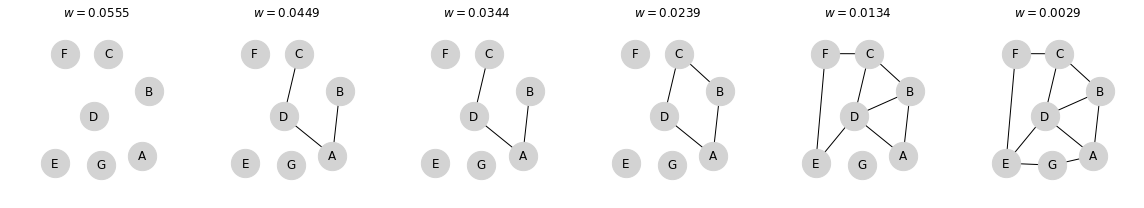

In [11]:
#create EVC filtration of total imbalance
filtration = get_weighted_filtration(G,fil_matrix,max_value - fil_steps)

VR_titles = ['$w = '+str(fil_steps[i])[:6]+'$' for i in range(len(fil_steps))]
make_wfiltration_fig(G,filtration,VR_titles,'')
plt.tight_layout()
plt.savefig('netfil.pdf')

# 5. Persistent barcodes for the total imbalance

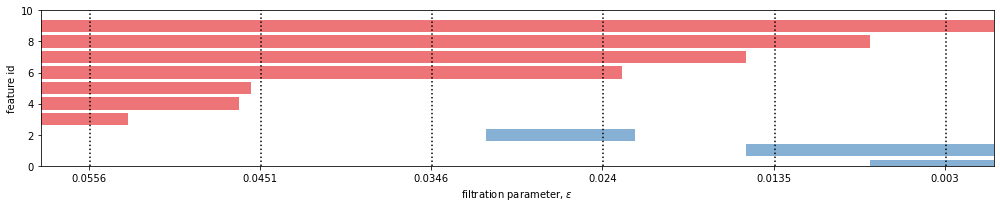

In [12]:
diag = dist2PD (fil_matrix, max_dim=2, max_edge_length=.1)[1]


f1,ax = subplots(1,1,figsize=(14,3))       
gd.plot_persistence_barcode (persistence=diag,axes=ax)

for i,step in enumerate(max_value - fil_steps):
    plt.plot([step,step],[0,10],'k:')

#x = [.0,.01,.02,.03,.04,.05,.06]
#values = [round(max_value-xx,4) for xx in x]
values = [ round(max_value-xx,4)  for xx in fil_steps]

plt.xlim([-.000,max_value])
plt.xticks (fil_steps,values)
plt.ylabel('feature id')
plt.xlabel('filtration parameter, $\epsilon$')

max_value

plt.title('')
plt.tight_layout()
plt.savefig('Pbc.pdf')
